In [1]:
import numpy as np
import autoencoder
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from scipy.signal import hann

In [2]:
days = '012'
fullXtrain = np.load(f'./datasets/Xtrain_tx0_days{days}.npy')
fullYtrain = np.load(f'./datasets/Ytrain_tx0_days{days}.npy')
fullXtest = np.load('./datasets/Xtest_tx0_days3.npy')
fullYtest = np.load('./datasets/Ytest_tx0_days3.npy')

In [3]:
filXtrain = []
filYtrain = []
filXtest = []
filYtest = []

for i in range(len(fullXtrain)):
    if fullYtrain[i] not in [5,8,14,24,25]:
        filXtrain.append(fullXtrain[i])
        filYtrain.append(fullYtrain[i])

for i in range(len(fullXtest)):
    if fullYtest[i] not in [5,8,14,24,25]:
        filXtest.append(fullXtest[i])
        filYtest.append(fullYtest[i])

In [4]:
rawXtrain, Ytrain = shuffle(filXtrain, filYtrain, n_samples=15800)
rawXtest, Ytest = shuffle(filXtest, filYtest, n_samples=3000)
rawXdev, Ydev = shuffle(filXtest, filYtest, n_samples=3000)

In [5]:
Xtrain = np.abs(np.fft.fft(rawXtrain * hann(len(rawXtrain[0]))))
Xtest = np.abs(np.fft.fft(rawXtest * hann(len(rawXtest[0]))))
Xdev = np.abs(np.fft.fft(rawXdev * hann(len(rawXdev[0]))))

In [6]:
autoenc, encoder = autoencoder.model(200, 12, loss='mean_squared_error')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 dense (Dense)               (None, 200)               40200     
                                                                 
 dense_1 (Dense)             (None, 64)                12864     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 12)                396       
                                                                 
 dense_4 (Dense)             (None, 32)                416       
                                                                 
 dense_5 (Dense)             (None, 64)                2112  

Epoch 1/100
494/494 [==============================] - 3s 5ms/step - loss: 0.1159 - val_loss: 0.0891
Epoch 2/100
494/494 [==============================] - 3s 7ms/step - loss: 0.0734 - val_loss: 0.0749
Epoch 3/100
494/494 [==============================] - 4s 7ms/step - loss: 0.0661 - val_loss: 0.0615
Epoch 4/100
494/494 [==============================] - 3s 5ms/step - loss: 0.0537 - val_loss: 0.0600
Epoch 5/100
494/494 [==============================] - 1s 3ms/step - loss: 0.0531 - val_loss: 0.0597
Epoch 6/100
494/494 [==============================] - 1s 3ms/step - loss: 0.0528 - val_loss: 0.0593
Epoch 7/100
494/494 [==============================] - 1s 3ms/step - loss: 0.0525 - val_loss: 0.0590
Epoch 8/100
494/494 [==============================] - 1s 3ms/step - loss: 0.0522 - val_loss: 0.0587
Epoch 9/100
494/494 [==============================] - 1s 3ms/step - loss: 0.0513 - val_loss: 0.0444
Epoch 10/100
494/494 [==============================] - 1s 3ms/step - loss: 0.0376 - val_lo

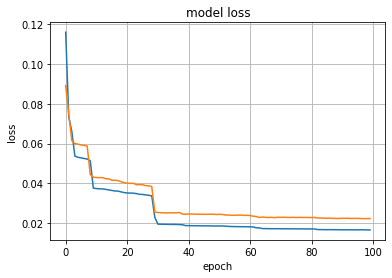

In [7]:
history = autoenc.fit(Xtrain, Xtrain, validation_data=(Xdev, Xdev), epochs=100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch'); plt.ylabel('loss')
plt.title('model loss'); plt.grid()
plt.show()

In [8]:
encXtest = encoder.predict(Xtest)
encXtrain = encoder.predict(Xtrain)
encXdev = encoder.predict(Xdev)

94/94 [==============================] - 0s 2ms/step


In [9]:
classifier = KNeighborsClassifier(n_neighbors=4, weights='distance', metric='cosine')
classifier.fit(encXtrain, Ytrain)

KNeighborsClassifier(metric='cosine', n_neighbors=4, weights='distance')

In [10]:
#print("Train score: ", classifier.score(encXtrain, Ytrain))
print("Test score: ", classifier.score(encXtest, Ytest))
print("Dev score: ", classifier.score(encXdev, Ydev))

Test score:  0.9606666666666667
Dev score:  0.9593333333333334


/home/dirog/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


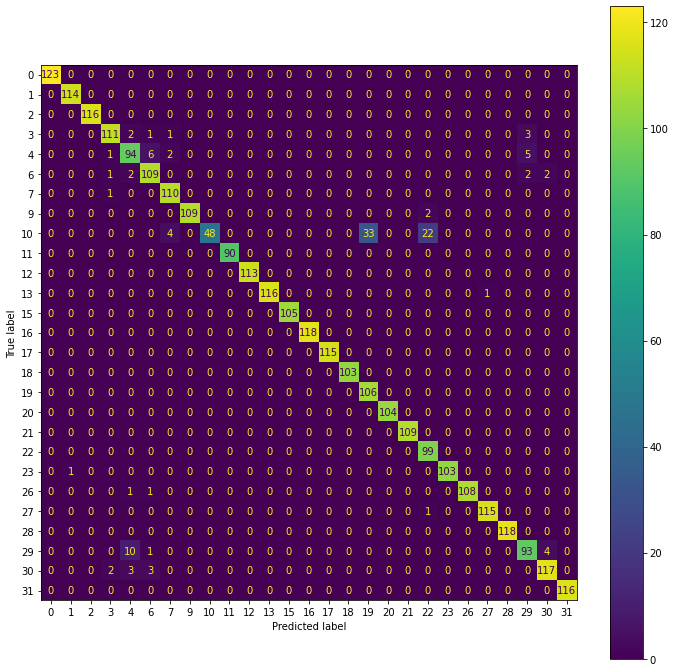

In [11]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(classifier, encXtest, Ytest, ax=ax)